Assume you perform a study to detect how using social networks affects people's happiness level. You have 20 volunteers. Your study is planned as follows. All participants are known to be active users of social networks. First you ask every participant to fill in special questionary that allows you to estimate their happiness level. After that, all participants will avoid using of social networks for one week. After this week, they complete similar questionary to detect their new level of happiness. Then, for each participant, their new happiness level is compared the initial one. Assume that for each participant their happiness level is changed: either decreased or increased. Let $X$ be the random variable that models the number of participants for who increased their happiness level. Let $X_{obs}$=16, i.e. 16 out of 20 participants become happier, and it's the only data on which you can make a decision. Your significance level is 5%.

1) You should state the null hypothesis and the alternative hypothesis of your research and explain your choices.

2) You should state how $X$ is distributed provided that null hypothesis holds.

3) Would you claim that people become happier when they avoid using social networks based on this data? 


Also keep in mind to provide any necessary calculations (p-values, etc.)

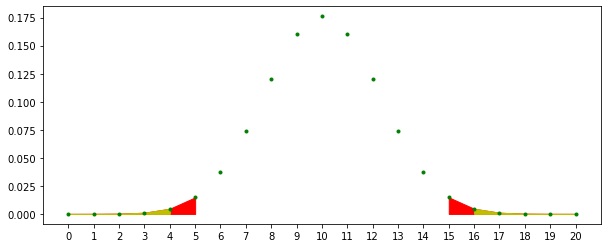

two-sided range: [0, 1, 2, 3, 4, 16, 17, 18, 19, 20]
p value: 0.01181793212890625
p value: 0.011817932128906248


In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n = 20
p = 1/2 
alpha = 0.05
x_obs = 16 
X = binom(n, p)

x = range(0, n+1)

left_range = [x for x in range(0,5)]
right_range = [x for x in range(16,21)]
cr_left_range = [x for x in range(0,6)]
cr_right_range = [x for x in range(15,21)]
fig, ax =  plt.subplots(1,1,figsize=(10,4))
ax.plot(x, X.pmf(x),".g")
ax.fill_between(cr_left_range, X.pmf(cr_left_range) ,color="r")
ax.fill_between(cr_right_range, X.pmf(cr_right_range) ,color="r")
ax.fill_between(left_range, X.pmf(left_range) ,color="y")
ax.fill_between(right_range, X.pmf(right_range) ,color="y")
ax.set_xticks(range(0, n+1,1))
plt.show()

print("two-sided range:",
      [i for i in range(0, n+1) 
       if abs(i-10) >= x_obs - n*p])
print("p value:", 2*(1-X.cdf(x_obs - 1)))
print("p value:", 
      sum([X.pmf(i) for i in range(0, n+1) 
           if abs(i-10) >= x_obs - n*p]))

In [2]:
x_crit = X.ppf(0.025)-1
print("left_rr:",n*p - x_crit, 
      "right_rr:",n*p + x_crit)
print("two-sided range:",
      [i for i in range(0, n+1) 
       if abs(i-10)>= abs(x_crit-10)])
print("alpha:", 2*X.cdf(x_crit))
print("alpha:", 
      sum([X.pmf(i) for i in range(0, n+1) 
           if abs(i-10)>= abs(x_crit-10)]))

left_rr: 5.0 right_rr: 15.0
two-sided range: [0, 1, 2, 3, 4, 5, 15, 16, 17, 18, 19, 20]
alpha: 0.04138946533203125
alpha: 0.04138946533203124


In [3]:
from scipy.stats import binom_test

binom_test(16, 20, 1/2, alternative='two-sided')

0.01181793212890625

In [6]:
sum([X.pmf(i) for i in [0,1,2,3,4,5]])

0.02069473266601562

In [7]:
sum([X.pmf(i) for i in [15,16,17,18,19,20]])

0.02069473266601562

You perform a clinical trial to study new drug. You have 20 volunteers with some disease. You randomly split all the volunteers into two groups (10 volunteers in each): the treatment group and the control group. Volunteers in the treatment group receive the new drug, volunteers in the control group receive placebo (pills that looks like a drug but do not have active substance). You conclude that new drug is effective if people who take the drug will recover faster (on average) than people in the control group. If your drug is effective, you will invest in its production, otherwise you will look for another drug. Assume that you obtained the following data (disease duration in days).

<table >
    <tr><th >control group  <th><th> treatment group  <tr><tr>
    <tr><td> 6 <td><td>  7 <td><tr>
    <tr><td> 7 <td><td>  6 <td><tr>
    <tr><td> 7 <td><td>  6 <td><tr>
    <tr><td> 5 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 8 <td><td>  6 <td><tr>
    <tr><td> 8 <td><td>  7 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  8 <td><tr>
<table>


Describe this problem in terms of statistical hypothesis testing framework. How would you model your data in terms of random variables? State the null hypothesis and the alternative. Will your alternative be one-sided or two-sided? Why? What kind of statistical test will you use? Why this test? Use this test (apply Python if necessary and provide your code), analyse the results and provide a conclusion in mathematical and real-life terms. Would you invest into production of this drug?

In [132]:
from scipy.stats import ttest_ind, t

control = [6, 7, 7, 5, 7, 8, 8, 7, 7, 7]
treatment = [7, 6, 6, 5, 5, 6, 7, 5, 5, 8]

n = len(control)

mu_c = np.mean(control)
var_c = np.var(control, ddof=1)

mu_t = np.mean(treatment)
var_t = np.var(treatment, ddof=1)

df_unequal_var =  (var_c/n + var_t/n)**2 /((var_c/n)**2 / (n - 1) 
                                       + (var_t/n)**2 / (n - 1))

print("df:", df_unequal_var)

t_cr = t(df=df_unequal_var).ppf(1-0.05/2)

print("left_rr:",-t_cr,"right_rr:", 
      t_cr, "alpha/2:",1-t(df=df_unequal_var).cdf(t_cr))
print("left_rr: {} right_rr: {}"
      .format(*t(df=df_unequal_var).interval(0.95)))

t_stat, p_val = ttest_ind(control, treatment, equal_var=False)

print("t-statistics: " + str(t_stat), 
      "p-value: " + str(p_val), sep="\n")

df: 17.414064087798927
left_rr: -2.106000564111092 right_rr: 2.106000564111092 alpha/2: 0.02500000000000535
left_rr: -2.106000564111092 right_rr: 2.106000564111092
t-statistics: 2.076923076923078
p-value: 0.05290570806269817


In [50]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

result = pg.ttest(control,
                  treatment,
                  correction=False)
 
# Print the result
print(result)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  2.076923   18   two-sided  0.052402  [-0.01, 1.81]  0.928828  1.649   

           power  
T-test  0.502319  


In [103]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg

result = pg.ttest(control,
                  treatment,
                  correction=True)
 
# Print the result
print(result)

               T        dof alternative     p-val          CI95%   cohen-d  \
T-test  2.076923  17.414064   two-sided  0.052906  [-0.01, 1.81]  0.928828   

         BF10     power  
T-test  1.649  0.502319  


In [99]:
def t_2sample(x, y):
    x_hat = np.mean(x)
    n = len(x)
    y_hat = np.mean(y)
    m = len(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    t_score = (x_hat - y_hat)/np.sqrt(var_x/n +var_y/m)
    return t_score

t_2sample(control, treatment)

2.076923076923078

If  is a standard normal random variable and  is an independent chi-square random variable (chi2) with  degrees of freedom, then

has a non-central Student’s t distribution on the real line. The degrees of freedom parameter  (denoted df in the implementation) satisfies  and the noncentrality parameter 

In [62]:
from scipy.stats import t, nct
# From pingouin source code.
# https://github.com/raphaelvallat/pingouin
# t-test power calculation:

nx = ny = len(control)
x = control
y = treatment
paired = True
tside = 2


#effect size d:
if not paired:
    # https://en.wikipedia.org/wiki/Effect_size
    dof = nx + ny - 2
    poolsd = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    d = (np.mean(x) - np.mean(y)) / poolsd
else:
    # Report Cohen d-avg (Cumming 2012; Lakens 2013)
    # Careful, the formula in Lakens 2013 is wrong. Updated in Pingouin
    # v0.3.4 to use the formula provided by Cummings 2012.
    # Before that the denominator was just (SD1 + SD2) / 2
    d = (np.mean(x) - np.mean(y)) / np.sqrt((np.var(x, ddof=1) + np.var(y, ddof=1)) / 2)
print("effect size:", d)

dof = nx + ny - 2
nc = d * (1 / np.sqrt(1 / nx + 1 / ny))
tcrit = t.ppf(1 - alpha / tside, dof)
power = nct.sf(tcrit, dof, nc) + nct.cdf(-tcrit, dof, nc) #nct.pdf(x, df, nc, loc, scale)
print("power:", power)

effect size: 0.9288282368076054
power: 0.502318899896168


In [6]:
import numpy as np

def f(a):
    y = (6+a)/3
    return (a-2)/np.sqrt(2*((2-y)**2 + (4-y)**2 + (a-y)**2))
def f(a):
    y = (6+a)/3
    return (a-2)/np.sqrt(2*(2/3*a**2-4*a+8))
for i in range(-5,10,1):
    print(i, f(i))

-5 -0.7406128966515283
-4 -0.7205766921228921
-3 -0.6933752452815365
-2 -0.6546536707079772
-1 -0.5960395606792697
0 -0.5
1 -0.3273268353539886
2 0.0
3 0.5
4 0.8660254037844387
5 0.981980506061966
6 1.0
7 0.9933992677987828
8 0.9819805060619659
9 0.9707253433941511


In [7]:
a =6
np.sqrt(2*(2/3*a**2-4*a+8))

4.0